In [1]:
from lib import *

In [2]:
import numpy as np

In [3]:
W1 = np.array(
    [[0.35, 0.35]
     ,[0.15, 0.25]
    ,[0.20, 0.30]]
    )

In [4]:
W2 = np.array(
    [[0.60, 0.60],
        [0.40, 0.50],
        [0.45, 0.55]]
        )

In [5]:
X = np.array([[0.05, 0.10]])
Y = np.array([[0.01, 0.99]])

In [6]:
model = Model("ajg",ANN(2,2))

In [7]:
layer1 = HiddenLayer("hidden1",2,2,W1,"sigmoid")
layer2 = OutputLayer("hidden2",2,2,W2,"sigmoid",Y)
model.add(layer1)
model.add(layer2)

In [8]:
model.summary()

Summary for Model: ajg
Layer: hidden1 | Type: hidden | Output shape: 2
Weights:
 [[0.35 0.35]
 [0.15 0.25]
 [0.2  0.3 ]]
_____________________________________
Layer: hidden2 | Type: output | Output shape: 2
Weights:
 [[0.6  0.6 ]
 [0.4  0.5 ]
 [0.45 0.55]]


In [9]:
model.predict(X)

array([[0.75136507, 0.77292847]])

In [10]:
model.fit(X,Y,2,0.5)

Epoch 1 completed
Loss: 0.2983711087600027
Epoch 2 completed
Loss: 0.28047144679143016


In [11]:
model.summary()

Summary for Model: ajg
Layer: hidden1 | Type: hidden | Output shape: 2
Weights:
 [[0.34170894 0.34049672]
 [0.14958545 0.24952484]
 [0.19917089 0.29904967]]
_____________________________________
Layer: hidden2 | Type: output | Output shape: 2
Weights:
 [[0.45969167 0.63730227]
 [0.31683545 0.52211075]
 [0.36633835 0.572243  ]]


In [12]:
model.summary()

Summary for Model: ajg
Layer: hidden1 | Type: hidden | Output shape: 2
Weights:
 [[0.34170894 0.34049672]
 [0.14958545 0.24952484]
 [0.19917089 0.29904967]]
_____________________________________
Layer: hidden2 | Type: output | Output shape: 2
Weights:
 [[0.45969167 0.63730227]
 [0.31683545 0.52211075]
 [0.36633835 0.572243  ]]


In [13]:
"""
coba testcase dari asisten buat sigmoid
{
    "case": {
        "model": {
            "input_size": 2,
            "layers": [
                {
                    "number_of_neurons": 2,
                    "activation_function": "sigmoid"
                }
            ]
        },
        "input": [
            [0.5, 0.0],
            [0.0, 0.5]
        ],
        "initial_weights": [
            [
              [0.3, 0.1], 
		  [0.2, 0.6],
		  [0.8, 0.3]
            ]
        ],
        "target": [
            [0.0, 1.0],
            [1.0, 0.0]
        ],
        "learning_parameters": {
            "learning_rate": 0.1,
            "batch_size": 2,
            "max_iteration": 10,
            "error_threshold": 0.01
        }
    },
    "expect": {
        "stopped_by": "max_iteration",
	  "final_weights":[
		 [
			[0.2329, 0.0601],
			[0.1288, 0.6484],
			[0.8376, 0.2315]
		 ]
	  ]
    }
}
"""

'\ncoba testcase dari asisten buat sigmoid\n{\n    "case": {\n        "model": {\n            "input_size": 2,\n            "layers": [\n                {\n                    "number_of_neurons": 2,\n                    "activation_function": "sigmoid"\n                }\n            ]\n        },\n        "input": [\n            [0.5, 0.0],\n            [0.0, 0.5]\n        ],\n        "initial_weights": [\n            [\n              [0.3, 0.1], \n\t\t  [0.2, 0.6],\n\t\t  [0.8, 0.3]\n            ]\n        ],\n        "target": [\n            [0.0, 1.0],\n            [1.0, 0.0]\n        ],\n        "learning_parameters": {\n            "learning_rate": 0.1,\n            "batch_size": 2,\n            "max_iteration": 10,\n            "error_threshold": 0.01\n        }\n    },\n    "expect": {\n        "stopped_by": "max_iteration",\n\t  "final_weights":[\n\t\t [\n\t\t\t[0.2329, 0.0601],\n\t\t\t[0.1288, 0.6484],\n\t\t\t[0.8376, 0.2315]\n\t\t ]\n\t  ]\n    }\n}\n'

In [14]:
W = np.array([
              [0.3, 0.1], 
		    [0.2, 0.6],
		    [0.8, 0.3]
            ])

In [15]:
X = np.array([
            [0.5, 0.0],
            [0.0, 0.5]
            ])
Y = np.array([
            [0.0, 1.0],
            [1.0, 0.0]
            ])


In [16]:
model2 = Model("ajg",ANN(2,2,learning_rate=0.1))
model2.add(OutputLayer("output1",2,2,W,"sigmoid",Y))
model2.summary()

Summary for Model: ajg
Layer: output1 | Type: output | Output shape: 2
Weights:
 [[0.3 0.1]
 [0.2 0.6]
 [0.8 0.3]]


In [17]:
model2.fit(X,Y,10,0.1,batch_size=2,error_threshold=0.01)

Epoch 1 completed
Loss: 0.4728101406019331
Epoch 2 completed
Loss: 0.47078073489758887
Epoch 3 completed
Loss: 0.46876757811986325
Epoch 4 completed
Loss: 0.4667706588834645
Epoch 5 completed
Loss: 0.4647899555600068
Epoch 6 completed
Loss: 0.4628254366344452
Epoch 7 completed
Loss: 0.46087706106867526
Epoch 8 completed
Loss: 0.45894477867098016
Epoch 9 completed
Loss: 0.4570285304700267
Epoch 10 completed
Loss: 0.4551282490921642


In [18]:
model2.summary()

Summary for Model: ajg
Layer: output1 | Type: output | Output shape: 2
Weights:
 [[0.23291176 0.06015346]
 [0.12884088 0.64849474]
 [0.837615   0.23158199]]


# Hasilnya sama gan

In [19]:
"""
Coba Softmax
{
    "case": {
        "model": {
            "input_size": 8,
            "layers": [
                {
                    "number_of_neurons": 3,
                    "activation_function": "softmax"
                }
            ]
        },
        "input": [
            [-2.4, -2.78, -0.6, 0.37, 2.46, -0.92, 2.76, 2.62],
            [-1.79, 1.65, -0.77, -1.03, 0.1, 2.12, -2.36, 1.25],
            [1.65, 2.34, 0.27, 2.34, 0.52, 1.37, 1.77, 0.62]
        ],
        "initial_weights": [
            [
                [0.1, 0.9, -0.1],
                [-0.2, 0.8, 0.2],
                [0.3, -0.7, 0.3],
                [0.4, 0.6, -0.4],
                [0.5, 0.5, 0.5],
                [-0.6, 0.4, 0.6],
                [-0.7, -0.3, 0.7],
                [0.8, 0.2, -0.8],
                [0.9, -0.1, 0.0]
            ]
        ],
        "target": [
            [0, 1, 0],
            [1, 0, 0],
            [0, 0, 1]
        ],
        "learning_parameters": {
            "learning_rate": 0.01,
            "batch_size": 1,
            "max_iteration": 10,
            "error_threshold": 0.05
        }
    },
    "expect": {
        "stopped_by": "max_iteration",
        "final_weights": [
            [
                [ 0.12674605,  0.9149538,  -0.14169985],
                [-0.33551647,  0.67700488,  0.45851159],
                [ 0.48314436, -0.85241216,  0.2692678 ],
                [ 0.3400255,   0.57237542, -0.31240092],
                [ 0.31397716,  0.46349737,  0.72252547],
                [-0.69652442,  0.4789189,   0.61760552],
                [-0.50884515, -0.36354141,  0.57238656],
                [ 0.41891295,  0.26354517, -0.48245812],
                [ 0.90374164, -0.01759501, -0.08614663]
            ]
        ]
    }
}
"""

'\nCoba Softmax\n{\n    "case": {\n        "model": {\n            "input_size": 8,\n            "layers": [\n                {\n                    "number_of_neurons": 3,\n                    "activation_function": "softmax"\n                }\n            ]\n        },\n        "input": [\n            [-2.4, -2.78, -0.6, 0.37, 2.46, -0.92, 2.76, 2.62],\n            [-1.79, 1.65, -0.77, -1.03, 0.1, 2.12, -2.36, 1.25],\n            [1.65, 2.34, 0.27, 2.34, 0.52, 1.37, 1.77, 0.62]\n        ],\n        "initial_weights": [\n            [\n                [0.1, 0.9, -0.1],\n                [-0.2, 0.8, 0.2],\n                [0.3, -0.7, 0.3],\n                [0.4, 0.6, -0.4],\n                [0.5, 0.5, 0.5],\n                [-0.6, 0.4, 0.6],\n                [-0.7, -0.3, 0.7],\n                [0.8, 0.2, -0.8],\n                [0.9, -0.1, 0.0]\n            ]\n        ],\n        "target": [\n            [0, 1, 0],\n            [1, 0, 0],\n            [0, 0, 1]\n        ],\n        "le

In [55]:
X = np.array([
            [-2.4, -2.78, -0.6, 0.37, 2.46, -0.92, 2.76, 2.62],
            [-1.79, 1.65, -0.77, -1.03, 0.1, 2.12, -2.36, 1.25],
            [1.65, 2.34, 0.27, 2.34, 0.52, 1.37, 1.77, 0.62]
        ])
Y = np.array([
            [0, 1, 0],
            [1, 0, 0],
            [0, 0, 1]
        ])

In [56]:
model3 = Model("ajg",ANN(8,3,learning_rate=0.01))
W = np.array([
                [0.1, 0.9, -0.1],
                [-0.2, 0.8, 0.2],
                [0.3, -0.7, 0.3],
                [0.4, 0.6, -0.4],
                [0.5, 0.5, 0.5],
                [-0.6, 0.4, 0.6],
                [-0.7, -0.3, 0.7],
                [0.8, 0.2, -0.8],
                [0.9, -0.1, 0.0]
            ])
model3.add(OutputLayer("output1",8,3,W,"softmax",Y))

In [57]:
model3.fit(X,Y,10,0.01,batch_size=1,error_threshold=0.05)

Epoch 1 completed
Loss: 0.7764326720561621
Epoch 2 completed
Loss: 0.8524736931926974
Epoch 3 completed
Loss: 0.9368612303795204
Epoch 4 completed
Loss: 0.9036143843158427
Epoch 5 completed
Loss: 0.7888414455351627
Epoch 6 completed
Loss: 0.691786872890397
Epoch 7 completed
Loss: 0.6100235912667268
Epoch 8 completed
Loss: 0.5412097014358183
Epoch 9 completed
Loss: 0.48323045526251013
Epoch 10 completed
Loss: 0.434255001220771


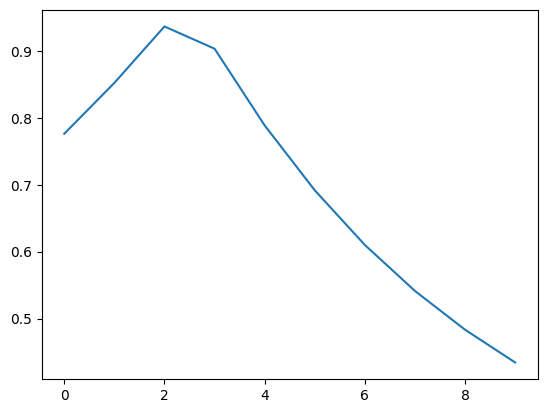

In [59]:
los = model3.loses
#plot grafik
import matplotlib.pyplot as plt
plt.plot(los)

In [58]:
model3.summary()

Summary for Model: ajg
Layer: output1 | Type: output | Output shape: 3
Weights:
 [[ 0.12674605  0.9149538  -0.14169985]
 [-0.33551647  0.67700488  0.45851159]
 [ 0.48314436 -0.85241216  0.2692678 ]
 [ 0.3400255   0.57237542 -0.31240092]
 [ 0.31397716  0.46349737  0.72252547]
 [-0.69652442  0.4789189   0.61760552]
 [-0.50884515 -0.36354141  0.57238656]
 [ 0.41891295  0.26354517 -0.48245812]
 [ 0.90374164 -0.01759501 -0.08614663]]


In [24]:
"""
{
    "case": {
        "model": {
            "input_size": 2,
            "layers": [
                {
                    "number_of_neurons": 3,
                    "activation_function": "linear"
                }
            ]
        },
        "input": [
            [3.0, 1.0],
            [1.0, 2.0]
        ],
        "initial_weights": [
            [
              [0.1, 0.3, 0.2],
              [0.4, 0.2, -0.7],
              [0.1, -0.8, 0.5]
            ]
        ],
        "target": [
            [ 2.0,  0.3, -1.9],
            [ 1.3, -0.7,  0.1]
        ],
        "learning_parameters": {
            "learning_rate": 0.1,
            "batch_size": 2,
            "max_iteration": 2,
            "error_threshold": 0.0
        }
    },
    "expect": {
        "stopped_by": "max_iteration",
        "final_weights": [
            [
              [ 0.166,  0.338, 0.153],
              [ 0.502,  0.226, -0.789],
              [ 0.214, -0.718,  0.427]
            ]
        ]
    }
}
"""

'\n{\n    "case": {\n        "model": {\n            "input_size": 2,\n            "layers": [\n                {\n                    "number_of_neurons": 3,\n                    "activation_function": "linear"\n                }\n            ]\n        },\n        "input": [\n            [3.0, 1.0],\n            [1.0, 2.0]\n        ],\n        "initial_weights": [\n            [\n              [0.1, 0.3, 0.2],\n              [0.4, 0.2, -0.7],\n              [0.1, -0.8, 0.5]\n            ]\n        ],\n        "target": [\n            [ 2.0,  0.3, -1.9],\n            [ 1.3, -0.7,  0.1]\n        ],\n        "learning_parameters": {\n            "learning_rate": 0.1,\n            "batch_size": 2,\n            "max_iteration": 2,\n            "error_threshold": 0.0\n        }\n    },\n    "expect": {\n        "stopped_by": "max_iteration",\n        "final_weights": [\n            [\n              [ 0.166,  0.338, 0.153],\n              [ 0.502,  0.226, -0.789],\n              [ 0.214, -0

In [25]:
model4 = Model("ajg",ANN(2,3,learning_rate=0.1))
W = np.array([
              [0.1, 0.3, 0.2],
              [0.4, 0.2, -0.7],
              [0.1, -0.8, 0.5]
            ])
X = np.array([
            [3.0, 1.0],
            [1.0, 2.0]
            ])
Y = np.array([
            [ 2.0,  0.3, -1.9],
            [ 1.3, -0.7,  0.1]
            ])

model4.add(OutputLayer("output1",2,3,W,"linear",Y))

In [26]:
model4.fit(X,Y,2,0.1,batch_size=2,error_threshold=0.0)

Epoch 1 completed
Loss: 0.665
Epoch 2 completed
Loss: 0.1818499999999999


In [27]:
model4.summary()

Summary for Model: ajg
Layer: output1 | Type: output | Output shape: 3
Weights:
 [[ 0.166  0.338  0.153]
 [ 0.502  0.226 -0.789]
 [ 0.214 -0.718  0.427]]


In [28]:
x = np.array([1,2,2,1,3])
#sort descending
x.sort()

In [29]:
print(x)

[1 1 2 2 3]


In [30]:
"""
{
    "case": {
        "model": {
            "input_size": 2,
            "layers": [
                {
                    "number_of_neurons": 4,
                    "activation_function": "relu"
                },
                {
                    "number_of_neurons": 2,
                    "activation_function": "softmax"
                }
            ]
        },
        "input": [
            [3.99, 2.96], 
            [-0.71, 2.8], 
            [-2.43, -0.2], 
            [-1.9, 2.62], 
            [-2.58, 1.43], 
            [-3.43, -0.25], 
            [1.15, -2.3], 
            [4.28, 3.45]
        ],
        "initial_weights": [
            [
                [0.1, -0.1, 0.1, -0.1],
                [-0.1, 0.1, -0.1, 0.1],
                [0.1, 0.1, -0.1, -0.1]
            ],
            [
                [0.12, -0.1],
                [-0.12, 0.1],
                [0.12, -0.1],
                [-0.12, 0.1],
                [0.02, 0.0]
            ]
        ],
        "target": [
            [0, 1],
            [1, 0],
            [0, 1],
            [1, 0],
            [1, 0],
            [0, 1],
            [1, 0],
            [0, 1]
        ],
        "learning_parameters": {
            "learning_rate": 0.1,
            "batch_size": 1,
            "max_iteration": 200,
            "error_threshold": 0.01
        }
    },
    "expect": {
        "stopped_by": "error_threshold",
        "final_weights": [
            [
                [-0.28730211, -0.28822282, -0.70597451,  0.42094471],
                [-0.5790794,  -1.1836444,  -1.34287961,  0.69575311],
                [-0.41434377,  1.51314676, -0.97649086, -1.3043465 ]
            ],
            [
                [-1.72078607,  1.74078607],
                [-0.50352956,  0.48352956],
                [ 1.25764816, -1.23764816],
                [-1.16998784,  1.14998784],
                [ 1.0907634,  -1.0707634 ]
            ]
        ]
    }
}

"""

'\n{\n    "case": {\n        "model": {\n            "input_size": 2,\n            "layers": [\n                {\n                    "number_of_neurons": 4,\n                    "activation_function": "relu"\n                },\n                {\n                    "number_of_neurons": 2,\n                    "activation_function": "softmax"\n                }\n            ]\n        },\n        "input": [\n            [3.99, 2.96], \n            [-0.71, 2.8], \n            [-2.43, -0.2], \n            [-1.9, 2.62], \n            [-2.58, 1.43], \n            [-3.43, -0.25], \n            [1.15, -2.3], \n            [4.28, 3.45]\n        ],\n        "initial_weights": [\n            [\n                [0.1, -0.1, 0.1, -0.1],\n                [-0.1, 0.1, -0.1, 0.1],\n                [0.1, 0.1, -0.1, -0.1]\n            ],\n            [\n                [0.12, -0.1],\n                [-0.12, 0.1],\n                [0.12, -0.1],\n                [-0.12, 0.1],\n                [0.02, 0.

In [67]:
X = np.array([
            [3.99, 2.96], 
            [-0.71, 2.8], 
            [-2.43, -0.2], 
            [-1.9, 2.62], 
            [-2.58, 1.43], 
            [-3.43, -0.25], 
            [1.15, -2.3], 
            [4.28, 3.45]
            ])

Y = np.array([
            [0, 1],
            [1, 0],
            [0, 1],
            [1, 0],
            [1, 0],
            [0, 1],
            [1, 0],
            [0, 1]
            ])

W1 = np.array([
                [0.1, -0.1, 0.1, -0.1],
                [-0.1, 0.1, -0.1, 0.1],
                [0.1, 0.1, -0.1, -0.1]
            ])

W2 = np.array([
                [0.12, -0.1],
                [-0.12, 0.1],
                [0.12, -0.1],
                [-0.12, 0.1],
                [0.02, 0.0]
            ])

In [68]:
model5 = Model("ajgg",ANN(2,4,learning_rate=0.01))

In [69]:
model5.add(HiddenLayer("hidden1",2,4,W1,"relu"))
model5.add(OutputLayer("output1",4,2,W2,"softmax",Y))

In [70]:
model5.fit(X,Y,20,0.1,batch_size=1,error_threshold=0.01)

Epoch 1 completed
Loss: 0.5373204376057451
Epoch 2 completed
Loss: 0.5764750550974945
Epoch 3 completed
Loss: 0.5866724537449856
Epoch 4 completed
Loss: 0.5924850217336046
Epoch 5 completed
Loss: 0.5950952952277749
Epoch 6 completed
Loss: 0.596135811669747
Epoch 7 completed
Loss: 0.6032588716576845
Epoch 8 completed
Loss: 0.6149550370345411
Epoch 9 completed
Loss: 0.44171088270437264
Epoch 10 completed
Loss: 0.6118724924074335
Epoch 11 completed
Loss: 0.6855732856517186
Epoch 12 completed
Loss: 0.49521778183116266
Epoch 13 completed
Loss: 0.6191389708913244
Epoch 14 completed
Loss: 0.5973996000332381
Epoch 15 completed
Loss: 0.6205555059398409
Epoch 16 completed
Loss: 0.4955160162014169
Epoch 17 completed
Loss: 0.4687994716171042
Epoch 18 completed
Loss: 0.4355354052280589
Epoch 19 completed
Loss: 0.4011620399222183
Epoch 20 completed
Loss: 0.36957753444468167


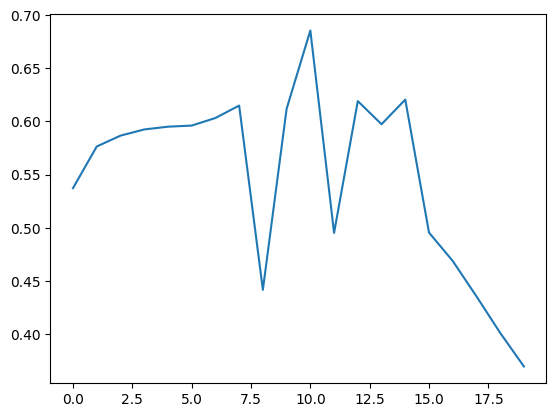

In [71]:
loss = model5.loses
#plot loss
import matplotlib.pyplot as plt
plt.plot(loss)

In [72]:
model5.summary()

Summary for Model: ajgg
Layer: hidden1 | Type: hidden | Output shape: 4
Weights:
 [[-0.21080123 -0.22712738 -0.51658809  0.19360365]
 [-0.46631252 -0.85536551 -1.06635009  0.43431089]
 [-0.30481332  1.06072898 -0.74179544 -0.78146207]]
_____________________________________
Layer: output1 | Type: output | Output shape: 2
Weights:
 [[-0.42335802  0.44335802]
 [-0.37079189  0.35079189]
 [ 0.83203554 -0.81203554]
 [-0.85743512  0.83743512]
 [ 0.64650156 -0.62650156]]


In [36]:
"""
{
    "case": {
        "model": {
            "input_size": 2,
            "layers": [
                {
                    "number_of_neurons": 3,
                    "activation_function": "relu"
                }
            ]
        },
        "input": [
            [1.0, 0.8],
            [-0.3, -1.0]
        ],
        "initial_weights": [
            [
                [-0.2, 0.2, 1.0],
                [0.3, 0.5, 0.5],
                [-0.5, -1.0, 0.5]
            ]
        ],
        "target": [
            [1.0, 0.1, 0.1],
            [0.1, 0.1, 1.0]
        ],
        "learning_parameters": {
            "learning_rate": 0.1,
            "batch_size": 2,
            "max_iteration": 1,
            "error_threshold": 0.0
        }
    },
    "expect": {
        "stopped_by": "max_iteration",
        "final_weights": [
            [
                [-0.211, 0.105, 0.885],
                [0.3033, 0.5285, 0.3005],
                [-0.489, -0.905, 0.291]
            ]
        ]
    }
}
"""

'\n{\n    "case": {\n        "model": {\n            "input_size": 2,\n            "layers": [\n                {\n                    "number_of_neurons": 3,\n                    "activation_function": "relu"\n                }\n            ]\n        },\n        "input": [\n            [1.0, 0.8],\n            [-0.3, -1.0]\n        ],\n        "initial_weights": [\n            [\n                [-0.2, 0.2, 1.0],\n                [0.3, 0.5, 0.5],\n                [-0.5, -1.0, 0.5]\n            ]\n        ],\n        "target": [\n            [1.0, 0.1, 0.1],\n            [0.1, 0.1, 1.0]\n        ],\n        "learning_parameters": {\n            "learning_rate": 0.1,\n            "batch_size": 2,\n            "max_iteration": 1,\n            "error_threshold": 0.0\n        }\n    },\n    "expect": {\n        "stopped_by": "max_iteration",\n        "final_weights": [\n            [\n                [-0.211, 0.105, 0.885],\n                [0.3033, 0.5285, 0.3005],\n                [-0.4

In [37]:
model6 = Model("ajgg",ANN(2,3,learning_rate=0.1))


In [38]:
X = np.array([
            [1.0, 0.8],
            [-0.3, -1.0]
            ])

Y = np.array([
            [1.0, 0.1, 0.1],
            [0.1, 0.1, 1.0]
            ])

W = np.array([
                [-0.2, 0.2, 1.0],
                [0.3, 0.5, 0.5],
                [-0.5, -1.0, 0.5]
            ])

model6.add(OutputLayer("output1",2,3,W,"relu",Y))

In [39]:
model6.fit(X,Y,1,0.1,batch_size=2,error_threshold=0.0)

Epoch 1 completed
Loss: 2.7935499999999998


In [40]:
model6.summary()

Summary for Model: ajgg
Layer: output1 | Type: output | Output shape: 3
Weights:
 [[-0.211   0.105   0.885 ]
 [ 0.3033  0.5285  0.3005]
 [-0.489  -0.905   0.291 ]]


In [ ]:
'''
{
    "case": {
        "model": {
            "input_size": 2,
            "layers": [
                {
                    "number_of_neurons": 2,
                    "activation_function": "linear"
                },
                {
                    "number_of_neurons": 2,
                    "activation_function": "relu"
                }
            ]
        },
        "input": [
            [-1.0, 0.2],
            [0.2, -1.0]
        ],
        "initial_weights": [
            [
                [0.1, 0.2],
                [-0.3, 0.5],
                [0.4, 0.5]
            ],
            [
                [0.2, 0.1],
                [0.4, -0.5],
                [0.7, 0.8]
            ]
        ],
        "target": [
            [1.0, 0.1],
            [0.1, 1.0]
        ],
        "learning_parameters": {
            "learning_rate": 0.1,
            "batch_size": 2,
            "max_iteration": 1,
            "error_threshold": 0.0
        }
    },
    "expect": {
        "stopped_by": "max_iteration",
        "final_weights": [
            [
                [0.08592, 0.32276],
                [-0.33872, 0.46172],
                [0.449984, 0.440072]
            ],
            [
                [0.2748, 0.188],
                [0.435904, -0.53168],
                [0.68504, 0.7824]
            ]
        ]
    }
}
'''

In [73]:
model7 = Model("ajgg",ANN(2,2,learning_rate=0.1))

X = np.array([
            [-1.0, 0.2],
            [0.2, -1.0]
            ])

Y = np.array([
            [1.0, 0.1],
            [0.1, 1.0]
            ])

W1 = np.array([
                [0.1, 0.2],
                [-0.3, 0.5],
                [0.4, 0.5]
            ])

W2 = np.array([
                [0.2, 0.1],
                [0.4, -0.5],
                [0.7, 0.8]
            ])

model7.add(HiddenLayer("hidden1",2,2,W1,"linear"))
model7.add(OutputLayer("output1",2,2,W2,"relu",Y))
model7.summary()

Summary for Model: ajgg
Layer: hidden1 | Type: hidden | Output shape: 2
Weights:
 [[ 0.1  0.2]
 [-0.3  0.5]
 [ 0.4  0.5]]
_____________________________________
Layer: output1 | Type: output | Output shape: 2
Weights:
 [[ 0.2  0.1]
 [ 0.4 -0.5]
 [ 0.7  0.8]]


In [74]:
model7.fit(X,Y,1,0.1,batch_size=2,error_threshold=0.0)

Epoch 1 completed
Loss: 0.676952


In [75]:
model7.summary()

Summary for Model: ajgg
Layer: hidden1 | Type: hidden | Output shape: 2
Weights:
 [[ 0.08592   0.32276 ]
 [-0.33872   0.46172 ]
 [ 0.449984  0.440072]]
_____________________________________
Layer: output1 | Type: output | Output shape: 2
Weights:
 [[ 0.2748    0.188   ]
 [ 0.435904 -0.53168 ]
 [ 0.68504   0.7824  ]]
